# Testes estatísticos - exemplos slides

In [1]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from scipy import stats


## Normalidade


/Users/miguelrocha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


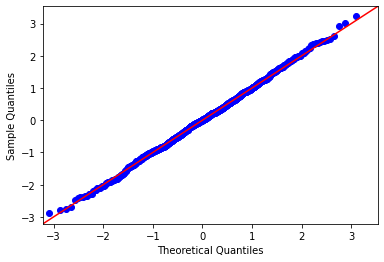

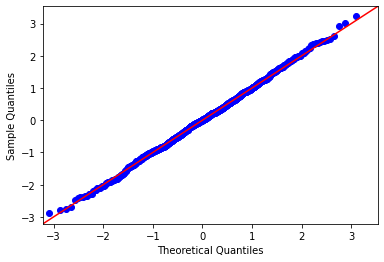

In [2]:
test =np.random.normal(0,1,1000)
sm.qqplot(test,line='45')

In [3]:
x = np.random.normal(0,1,1000)
w, p_value = stats.shapiro(x)
print (p_value)

x = np.random.random(1000)
w, p_value = stats.shapiro(x)
print(p_value)

0.4135034382343292
1.4722756112259825e-18


## Teste à média

In [4]:
diasChuva16= [15, 10, 13, 7, 9, 8, 21, 9, 14, 8, 17, 15]
diasChuva17 = [15, 14, 12, 8, 14, 7, 16, 10, 15, 12, 16, 15]

print(stats.ttest_ind(diasChuva16, diasChuva17) )

print(sm.stats.ttest_ind(diasChuva16, diasChuva17) )

Ttest_indResult(statistic=-0.434093113093399, pvalue=0.6684483173666276)
(-0.434093113093399, 0.6684483173666276, 22.0)


## Análise à variância

In [6]:
iris = pd.read_csv('iris.csv',sep=',', index_col = 0)
iris.columns =["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width","Species"]
g1 = iris[iris["Species"]=="setosa"]
g2 = iris[iris["Species"]=="virginica"]
g3 = iris[iris["Species"]=="versicolor"]

stats.f_oneway(g1.Petal_Length,g2.Petal_Length,g3.Petal_Length)


F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)

In [7]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
lm = ols("iris.Petal_Length~iris.Species", iris).fit()
lm = ols("iris['Petal_Length']~iris['Species']", iris).fit()
anova_lm(lm)
#iris.head()

,df,sum_sq,mean_sq,F,PR(>F)
iris['Species'],2.0,437.1028,218.551400,1180.161182,2.856777e-91
Residual,147.0,27.2226,0.185188,NaN,NaN


In [8]:
import statsmodels.stats.multicomp as multi

x = np.random.choice(['A','B','C'], 50)
y = np.random.normal(0,1,50)
mcDate = multi.MultiComparison(y,x)

Results = mcDate.tukeyhsd()
print(Results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   0.2732 0.6803 -0.5367  1.083  False
     A      C  -0.5345 0.2452 -1.3301 0.2611  False
     B      C  -0.8076 0.0629 -1.6503  0.035  False
---------------------------------------------------
